#**PANUGANTI SAI LIKHITH**

sailikithpaanuganti@gmail.com

https://www.linkedin.com/in/sailikhith

# Dataset Required

https://github.com/Sai-Likhith/Mobile-Price-Range-Prediction-A-Data-Science-Approach/blob/main/mobile_price_range_data.csv

#Importing Required Libraries

In [46]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#Uploading csv file and Getting started

In [47]:
data1 = pd.read_csv('/content/mobile_price_range_data.csv')     #Reading the csv file and assigning the name for csv file as data1

In [48]:
data1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#Normalizing the data

In [50]:
data = data1.drop(['price_range'], axis = 1)           #Price should not be normalized, so removing Price Column from the data

In [51]:
min_max_Scalar = preprocessing.MinMaxScaler()             #Using MaxMinScaler

In [52]:
col = data.columns
result = min_max_Scalar.fit_transform(data)
data= pd.DataFrame(result, columns=col)

In [53]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


#Removing handle null values (if any)

In [54]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [55]:
data = data.dropna(axis=0,inplace=False)

In [56]:
data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#Price Range

In [57]:
y = data1['price_range']
x = data

In [58]:
y.unique()

array([1, 2, 3, 0])

In [59]:
# Balanced or Unbalanced based on the Price Range
# 1. LOW COST
# 2. MEDIUM COST
# 3. HIGH COST
# 4. VERY HIGH COST

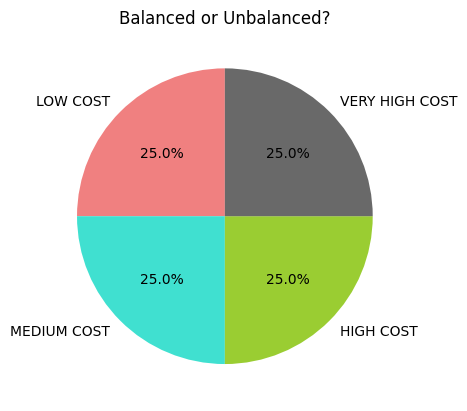

In [60]:
labels = ["LOW COST", "MEDIUM COST", "HIGH COST", "VERY HIGH COST"]
values = data1['price_range'].value_counts().values
colors = ['lightcoral','turquoise','yellowgreen', 'dimgray']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.set_title('Balanced or Unbalanced?')
plt.show()

#Spliting data into training and testing data

In [61]:
from numpy.random import RandomState
rng = RandomState()

#Spliting the given data into two parts i.e., Training data and Testing data

train = data.sample(frac=0.9, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

In [62]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1688,0.114896,1.0,0.56,0.0,0.684211,1.0,0.532258,0.333333,0.516667,0.714286,0.70,0.559184,0.714286,0.877873,0.928571,0.944444,0.111111,1.0,0.0,1.0
1808,0.471610,0.0,0.00,0.0,0.000000,0.0,0.903226,0.222222,0.266667,1.000000,0.00,0.207143,0.120828,0.066007,0.142857,0.166667,0.166667,1.0,1.0,0.0
934,0.034736,0.0,0.00,1.0,0.105263,1.0,0.338710,0.444444,0.325000,0.285714,0.15,0.506633,0.678905,0.728220,0.142857,0.166667,0.666667,1.0,0.0,0.0
1852,0.098196,1.0,0.52,0.0,0.052632,1.0,0.935484,0.000000,0.958333,0.428571,0.20,0.475000,0.875167,0.150454,0.357143,0.166667,0.111111,1.0,0.0,0.0
1079,0.929860,1.0,0.00,1.0,0.052632,0.0,0.338710,0.000000,0.825000,1.000000,0.15,0.613776,0.622163,0.327632,0.714286,0.388889,0.833333,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.244489,0.0,0.36,1.0,0.000000,1.0,0.032258,0.666667,0.458333,0.714286,0.05,0.035714,0.983979,0.142704,0.571429,0.333333,0.055556,1.0,1.0,0.0
1218,0.881096,1.0,0.36,0.0,0.263158,0.0,0.790323,0.888889,0.691667,0.857143,0.50,0.103061,0.923899,0.594602,0.428571,0.500000,0.500000,0.0,0.0,0.0
1274,0.735471,0.0,0.88,0.0,0.210526,1.0,0.709677,0.555556,0.316667,0.000000,0.25,0.139286,0.375167,0.429182,0.785714,0.500000,0.000000,1.0,0.0,1.0
1950,0.708083,1.0,0.44,1.0,0.052632,1.0,0.403226,0.777778,0.783333,0.285714,0.50,0.337755,0.249666,0.253608,0.500000,0.388889,0.055556,1.0,1.0,0.0


In [63]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
26,0.012024,1.0,0.44,1.0,0.368421,1.0,0.790323,0.222222,0.433333,0.428571,0.95,0.280612,0.096796,0.937199,0.785714,0.055556,0.111111,1.0,0.0,1.0
27,0.303941,0.0,0.00,0.0,0.052632,1.0,0.629032,1.000000,0.525000,0.857143,0.30,0.260714,0.383845,0.809727,0.857143,0.444444,0.555556,1.0,1.0,0.0
32,0.546426,1.0,0.16,0.0,0.157895,1.0,0.629032,0.888889,0.225000,0.000000,0.90,0.043367,0.435247,0.526724,0.928571,0.277778,0.055556,1.0,1.0,1.0
55,0.958584,0.0,0.64,1.0,0.526316,1.0,0.709677,0.555556,0.200000,0.285714,1.00,0.340306,0.357810,0.613576,0.642857,0.388889,0.611111,1.0,0.0,0.0
68,0.494990,0.0,0.24,1.0,0.000000,0.0,0.129032,0.555556,0.708333,0.142857,0.05,0.234184,0.483979,0.212186,0.428571,0.055556,0.111111,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,0.597862,1.0,0.04,0.0,0.000000,0.0,0.564516,0.666667,0.450000,0.428571,0.75,0.285714,0.451936,0.651523,0.928571,0.166667,0.944444,0.0,0.0,1.0
1960,0.375418,0.0,0.60,0.0,0.000000,0.0,0.403226,0.111111,0.050000,0.714286,0.35,0.102551,0.054740,0.644575,0.500000,0.277778,0.944444,0.0,0.0,0.0
1989,0.056780,0.0,0.92,0.0,0.105263,0.0,0.209677,0.111111,0.025000,0.285714,0.55,0.122959,0.236315,0.624265,0.500000,0.444444,0.055556,0.0,0.0,0.0
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0


In [64]:
train.index

Int64Index([1688, 1808,  934, 1852, 1079, 1523,  334, 1169, 1827, 1796,
            ...
            1704, 1298,  979, 1317, 1649,  112, 1218, 1274, 1950, 1949],
           dtype='int64', length=1800)

In [65]:
y_train = y[train.index]

In [66]:
y_test = y[test.index]

In [67]:
y_train

1688    3
1808    0
934     2
1852    0
1079    2
       ..
112     0
1218    2
1274    1
1950    1
1949    2
Name: price_range, Length: 1800, dtype: int64

In [68]:
y_test

26      3
27      3
32      1
55      2
68      0
       ..
1937    2
1960    2
1989    1
1995    0
1998    0
Name: price_range, Length: 200, dtype: int64

In [69]:
print(train.shape)
print(test.shape)

#Printing the shapes of the Test and Train data

(1800, 20)
(200, 20)


#Correlations between the Attributes

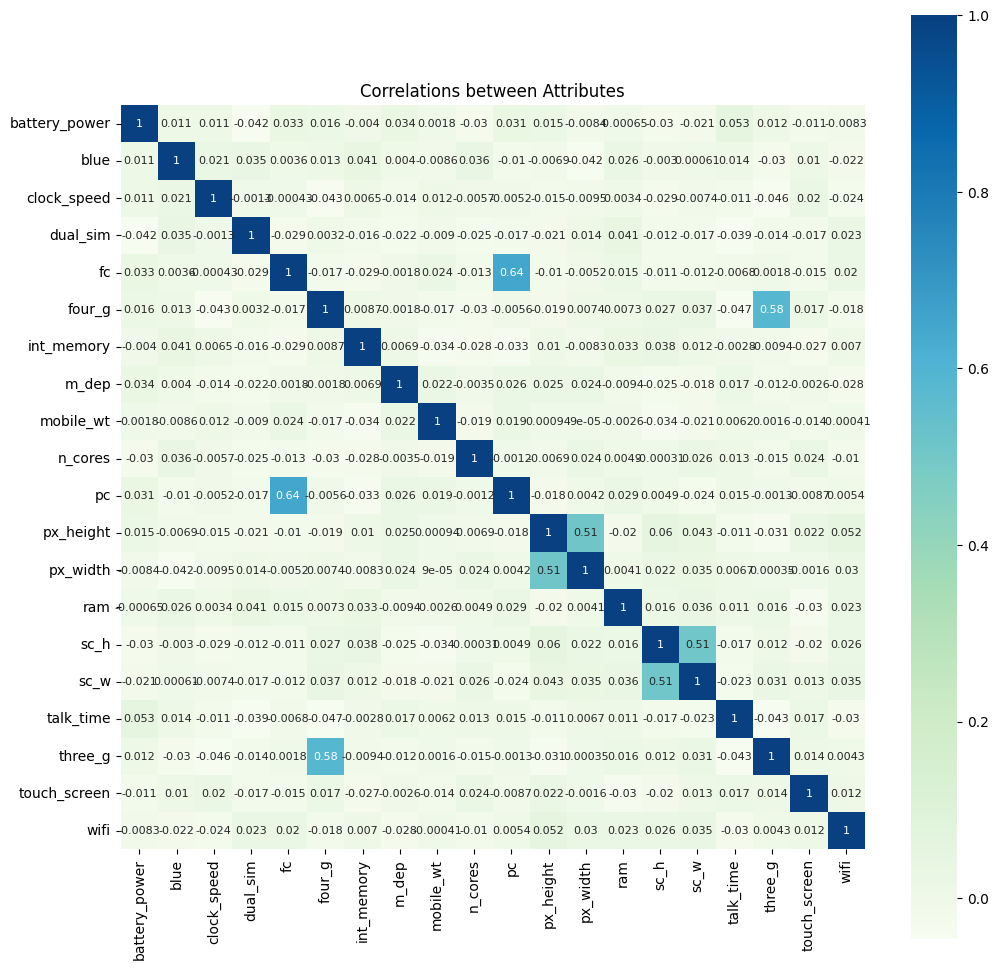

In [70]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

#Plotting the Correlation between the Attributes

# 1. Logistic Regression

In [71]:
#Applying Logistic Regression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'saga',  max_iter = 10000)
lr.fit(train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [72]:
y_pred_lr = lr.predict(test)

In [73]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix_lr

array([[50,  2,  0,  0],
       [ 2, 50,  3,  0],
       [ 0,  4, 35,  5],
       [ 0,  0,  2, 47]])

In [74]:
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
acc_lr

0.91

#2. KNN Classification


In [75]:
#Applying KNN Classification

model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [76]:
y_pred_knn = model_knn.predict(test)

In [77]:
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
confusion_matrix_knn

array([[32, 11,  9,  0],
       [18, 11, 22,  4],
       [12, 12, 11,  9],
       [ 4, 10, 16, 19]])

In [78]:
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
acc_knn

0.365

#3. SVM Classifier with linear

In [79]:
#Applying Linear SVM Classifier

from sklearn import svm
svm_clf = svm.LinearSVC(multi_class='ovr', max_iter = 1000)

In [80]:
svm_clf.fit(train, y_train)
y_pred_svm=svm_clf.predict(test)

In [81]:
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
confusion_matrix_svm

array([[52,  0,  0,  0],
       [ 6, 40,  9,  0],
       [ 0, 12, 24,  8],
       [ 0,  0,  0, 49]])

In [82]:
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_svm

0.825

#4. RBF Kernel

In [83]:
#Applying RBF Kernel

from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svm.fit(train, y_train)

SVC(C=1, gamma=0.01, random_state=0)

In [84]:
y_pred_svm_rbf=svm.predict(test)

In [85]:
confusion_matrix_rbf = metrics.confusion_matrix(y_test, y_pred_svm_rbf)
confusion_matrix_rbf

array([[40, 12,  0,  0],
       [ 6, 36, 13,  0],
       [ 0,  5, 38,  1],
       [ 0,  0, 14, 35]])

In [86]:
acc_rbf = accuracy_score(y_test,y_pred_svm_rbf)
acc_rbf

0.745

#Predict the price range for test data


In [87]:
predicted_labels = y_pred_lr.tolist()
actual_labels = y_test.tolist()

In [88]:
dict = {'predicted_labels': predicted_labels, 'actual_labels' : actual_labels}
prediction_result = pd.DataFrame(dict)

In [89]:
print(prediction_result.to_string())

     predicted_labels  actual_labels
0                   3              3
1                   3              3
2                   1              1
3                   3              2
4                   0              0
5                   1              1
6                   0              0
7                   0              0
8                   1              1
9                   1              1
10                  3              3
11                  2              2
12                  3              3
13                  3              3
14                  3              3
15                  0              0
16                  2              1
17                  3              3
18                  3              2
19                  0              0
20                  1              1
21                  1              1
22                  1              1
23                  3              3
24                  3              3
25                  1              1
2

# Confusion matrix and classification report

In [90]:
print("Confusion matrix for Logistic Regression is : ")
print(confusion_matrix_lr)
print('\n')
print("Confusion matrix for KNN is : ")
print(confusion_matrix_knn)
print('\n')
print("Confusion matrix for SVM is : ")
print(confusion_matrix_svm)
print('\n')
print("Confusion matrix for RBL Kernel is : ")
print(confusion_matrix_rbf)

Confusion matrix for Logistic Regression is : 
[[50  2  0  0]
 [ 2 50  3  0]
 [ 0  4 35  5]
 [ 0  0  2 47]]


Confusion matrix for KNN is : 
[[32 11  9  0]
 [18 11 22  4]
 [12 12 11  9]
 [ 4 10 16 19]]


Confusion matrix for SVM is : 
[[52  0  0  0]
 [ 6 40  9  0]
 [ 0 12 24  8]
 [ 0  0  0 49]]


Confusion matrix for RBL Kernel is : 
[[40 12  0  0]
 [ 6 36 13  0]
 [ 0  5 38  1]
 [ 0  0 14 35]]


In [91]:
from sklearn.metrics import classification_report

In [92]:
target_names = np.unique(y)

In [93]:
target_names = ['0', '1', '2', '3']

In [94]:
y_pred_lr.shape

(200,)

In [95]:
print(classification_report(y_test.ravel() , y_pred_lr.ravel(), target_names=target_names))     #Classification Report

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.89      0.91      0.90        55
           2       0.88      0.80      0.83        44
           3       0.90      0.96      0.93        49

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200




#Which Model is more Accurate...!!!

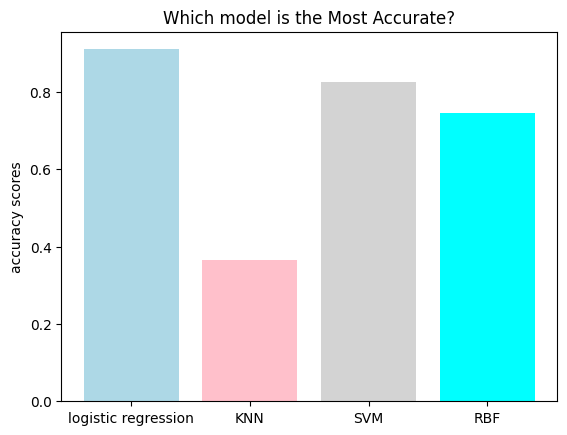

In [96]:
models = ['logistic regression', 'KNN', 'SVM', 'RBF']
acc_scores = [acc_lr, acc_knn, acc_svm, acc_rbf]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the Most Accurate?")
plt.show()

#Displays which is Most accurate among the four Models